========== EDA steps ================
1. Read the data
2. Separate categorical columns and Numerical Columns
3. Data quick checks
   shape, columns, dtypes,
4. Null value analysis

   A) Check if any Null values are present

   B) Fill the null values with Median or KNN Imputer for Numerical Columns

   C) Fill the null values with Mode for categorical columns
   
5. Do some data preprocess

   if any column is corrupted
   
6. Drop the Id type columns

   which means a Data has more unique labels

   Drop the Single value columns
   
7. Categorical column analysis
  
   A) Frequency table
   
   B) Bar charts
   
   C) Pie charts
   
8. Numerical Column analysis
   
   A) Histogram
   
   B) Distribution
   
   C) Box plot
   
9. Outlier analysis
   
   Impute the outliers with Median
   
10. Find the Correlation between numerical columns
    Heat map


11. Convert cat to Numerical
    A) LabelEncoder

    B) One hot encoder

12. Scale the data
   -  A) Z standardization

   - B) Normalization

By the time of 12 steps, we achieve 3 things:

    (i) Cleaned data

    (ii) Data in the form of complete Numerical

    (iii) We have some understanding of the data

13. We will try to select the important feature for ML model
    A) PCA: principle component analysis (will be covered in ML)

Finally, we achieve 3 data sets:

Till step-11
 
 Without scale but data in Numerical format

**1).Reading Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_df=pd.read_csv("loan_dataset.csv")

In [3]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


**2).Separate categorical columns and Numerical Columns**

In [4]:
cat=loan_df.select_dtypes(include="object").columns
num=loan_df.select_dtypes(exclude="object").columns

**3).Data quick checks**
   - shape
   - columns
   - dtypes

In [5]:
print(loan_df.shape)
print(loan_df.columns)
print(loan_df.dtypes)
print(loan_df.head())
print(loan_df.tail())


(367, 12)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate   

**4. Null value analysis**

   - A) Check if any Null values are present





In [6]:
loan_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

   - B) Fill the null values with Median or KNN Imputer for Numerical Columns

In [7]:
for i in num:
    median = loan_df[i].median() 
    loan_df[i] = loan_df[i].fillna(median)

In [8]:
loan_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

   - C) Fill the null values with Mode for categorical columns

In [9]:
for i in cat:
    mode=loan_df[i].mode()[0]
    loan_df[i]=loan_df[i].fillna(mode)

In [10]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [11]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


**5). Do some data preprocess**

   - if any column is corrupted

In [12]:
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

- Dependent should be numeric column but because of + its became a categorical column`
- We need to replace 3+ to only 3

In [13]:
loan_df["Dependents"]=loan_df["Dependents"].replace("3+",3)

In [14]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


**6. Drop the Id type columns**

   - which means a Data has more unique labels

   - Drop the Single value columns

- Check Unique Labels

In [15]:
loan_df["Loan_ID"].nunique()

367

In [16]:
for i in loan_df:
    print("-",loan_df[i].nunique())

- 367
- 2
- 2
- 4
- 2
- 2
- 314
- 194
- 144
- 12
- 2
- 3


- we will drop Loan_ID column

In [17]:
loan_df=loan_df.drop("Loan_ID",axis=1)

In [18]:
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


**7). Categorical column analysis**
  
   - A) Frequency table
   

   


In [19]:
loan_df['Dependents'] = loan_df['Dependents'].astype('int')
loan_df.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [20]:
import os
cat=loan_df.select_dtypes(include="object").columns
cwd=os.getcwd()
folder_name="Frequency Table"
for i in cat:
    label=loan_df[i].value_counts().keys()
    values=loan_df[i].value_counts().values
    file_name=f"{i}_Freq_Table"
    os.makedirs(folder_name,exist_ok=True)
    directory=os.path.join(cwd,folder_name)
    path=os.path.join(directory,file_name)
    df=pd.DataFrame(zip(label,values),columns=["Labels","Values"])
    df.to_csv(path)


   - B) Bar charts

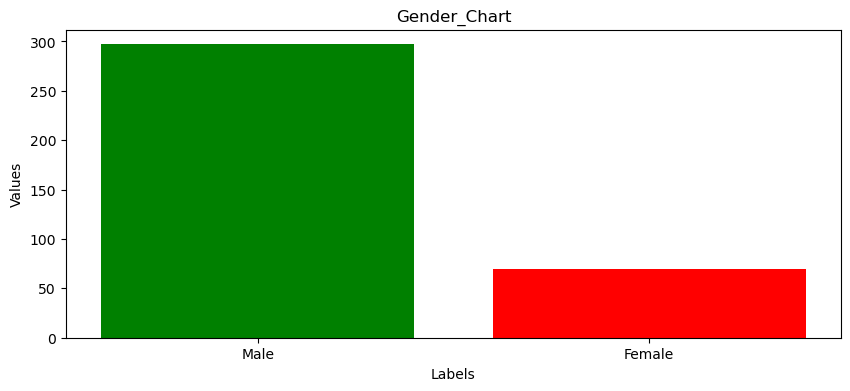

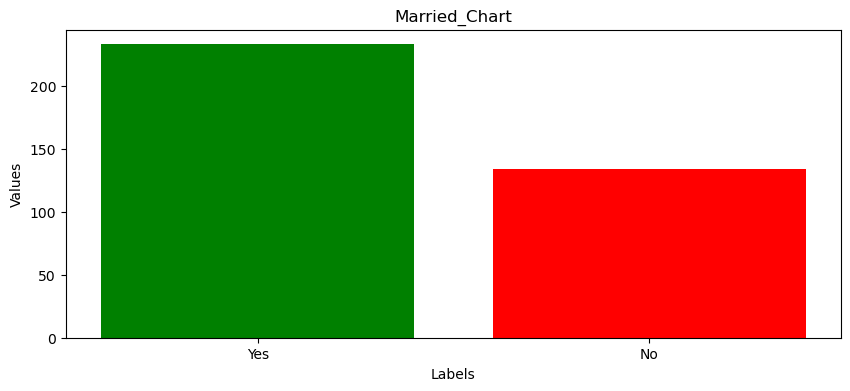

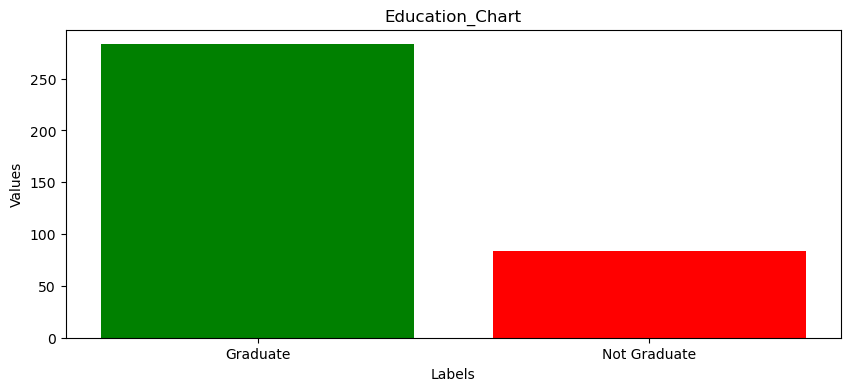

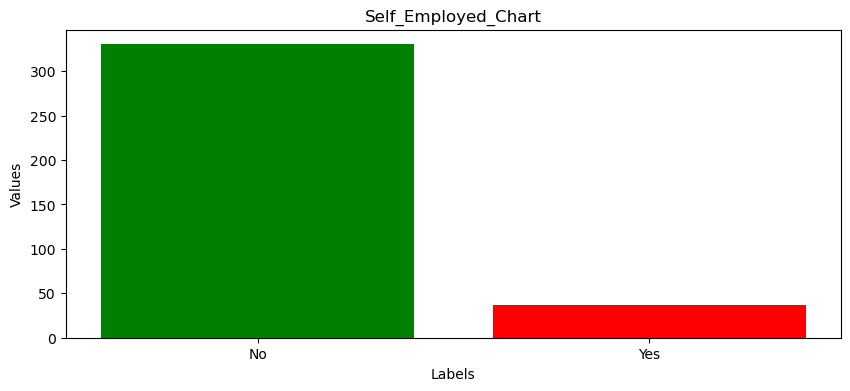

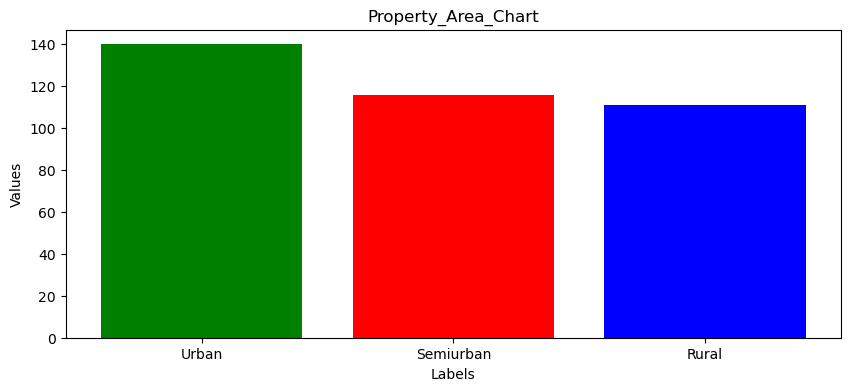

In [21]:
folder_name="Bar Charts"
for i in cat:
    label=loan_df[i].value_counts().keys()
    values=loan_df[i].value_counts().values
    file_name=f"{i}_bar_chart"
    os.makedirs(folder_name,exist_ok=True)
    directory=os.path.join(cwd,folder_name)
    path=os.path.join(directory,file_name)
    plt.figure(figsize=(10,4))
    plt.title(f"{i}_Chart")
    plt.bar(label,values,color=["Green","Red","Blue"])
    plt.xlabel("Labels")
    plt.ylabel("Values")
    plt.savefig(path)
    plt.show()

   - C) Pie charts

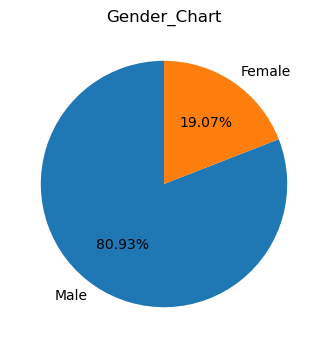

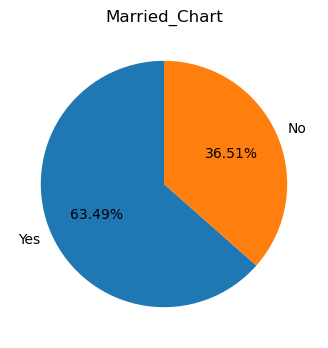

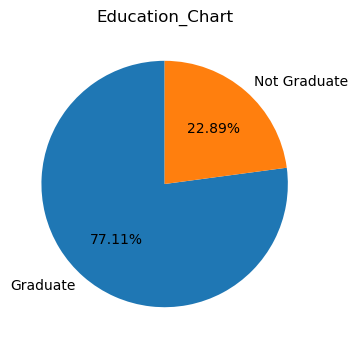

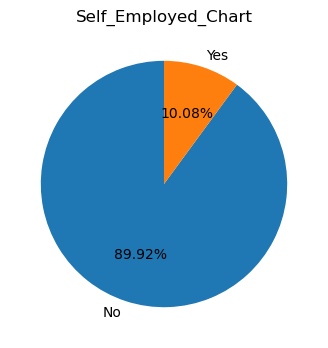

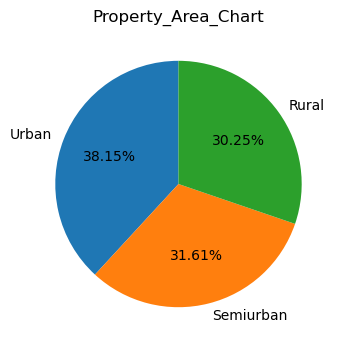

In [22]:
folder_name="Pie Charts"
for i in cat:
    label=loan_df[i].value_counts().keys()
    values=loan_df[i].value_counts().values
    file_name=f"{i}_pie_chart"
    os.makedirs(folder_name,exist_ok=True)
    directory=os.path.join(cwd,folder_name)
    path=os.path.join(directory,file_name)
    plt.figure(figsize=(10,4))
    plt.title(f"{i}_Chart")
    plt.pie(values, labels=label, autopct='%1.2f%%', startangle=90)
    plt.savefig(path)
    plt.show()

**8. Numerical Column analysis**
   
   - A) Histogram
   


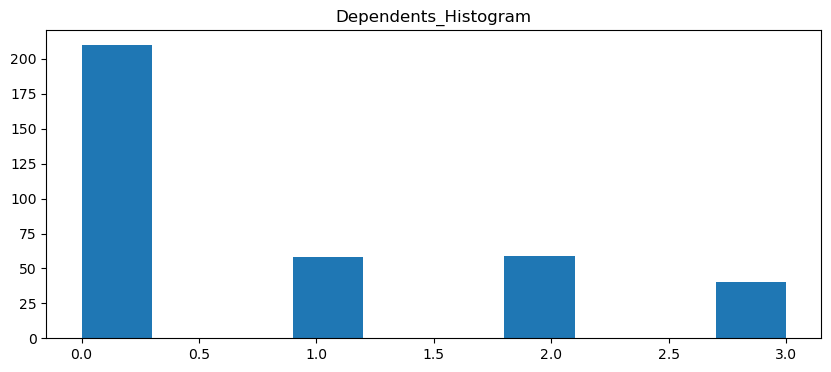

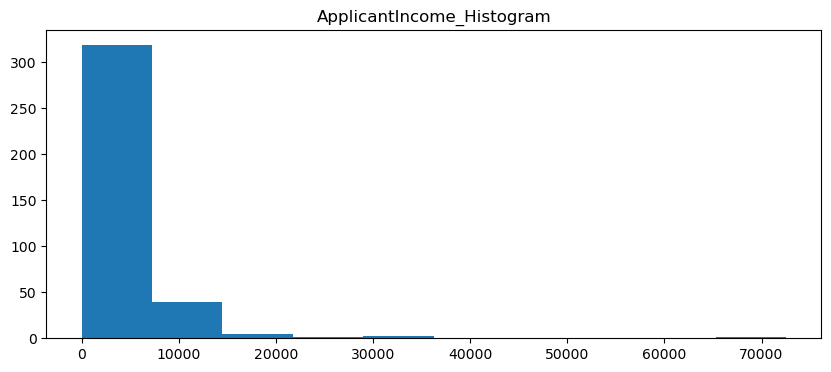

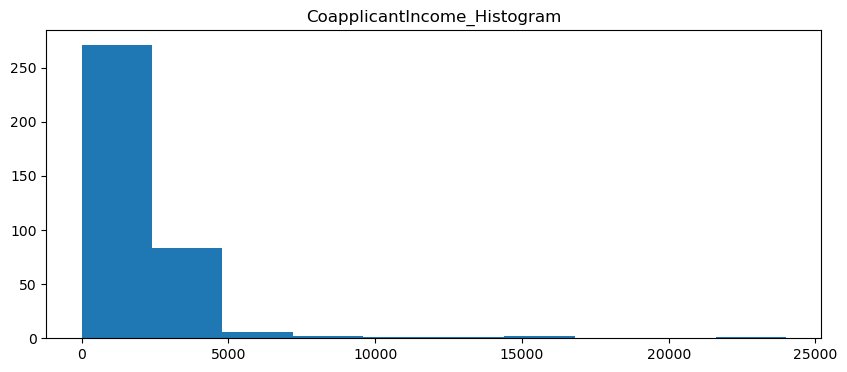

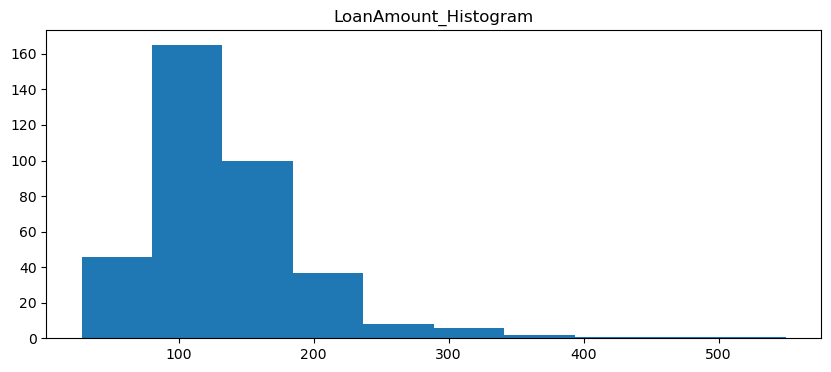

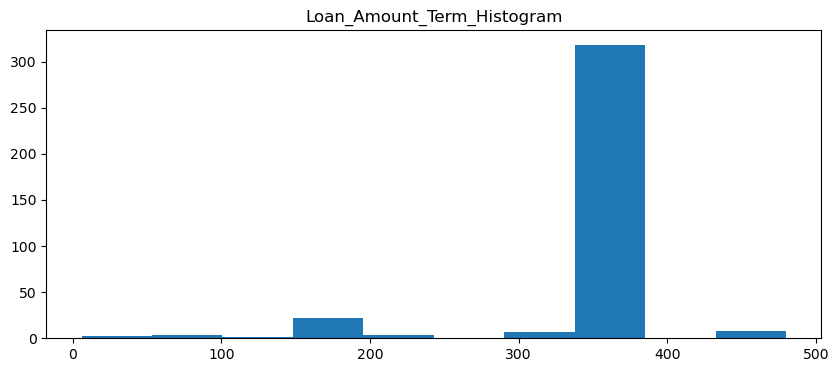

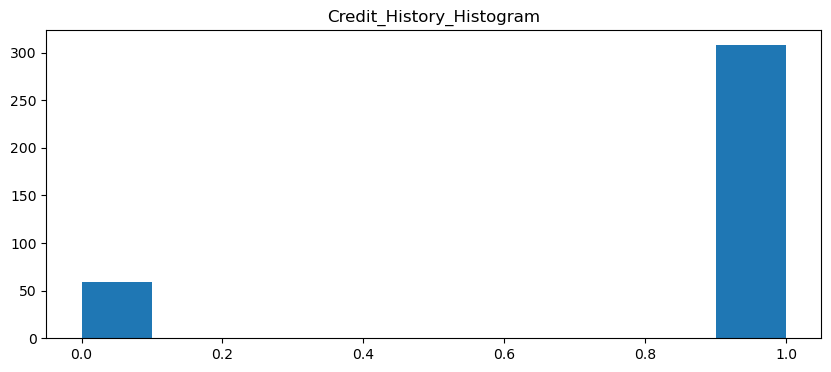

In [23]:
num=loan_df.select_dtypes(exclude="object").columns
folder_name="Histograms"
for i in num:
    plt.figure(figsize=(10,4))
    plt.title(f"{i}_Histogram")
    plt.hist(loan_df[i])
    file_name=f"{i}_histogram"
    os.makedirs(folder_name,exist_ok=True)
    directory=os.path.join(cwd,folder_name)
    path=os.path.join(directory,file_name)
    plt.savefig(path)
    plt.show()

   - B) Distribution
   


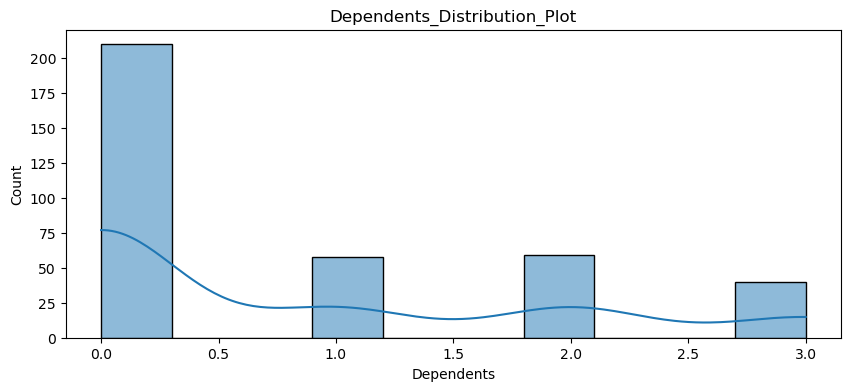

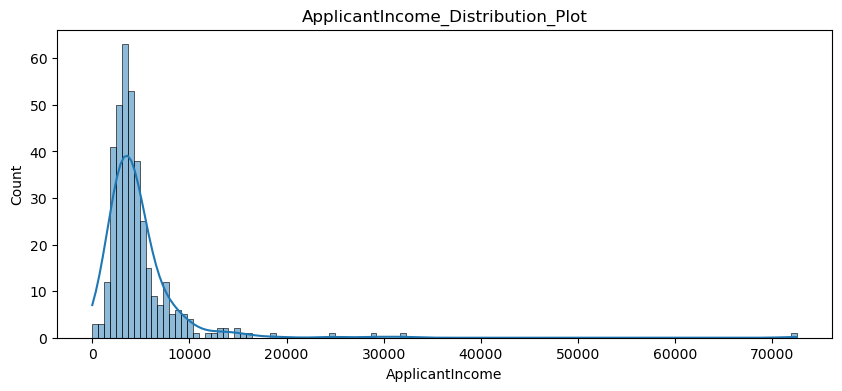

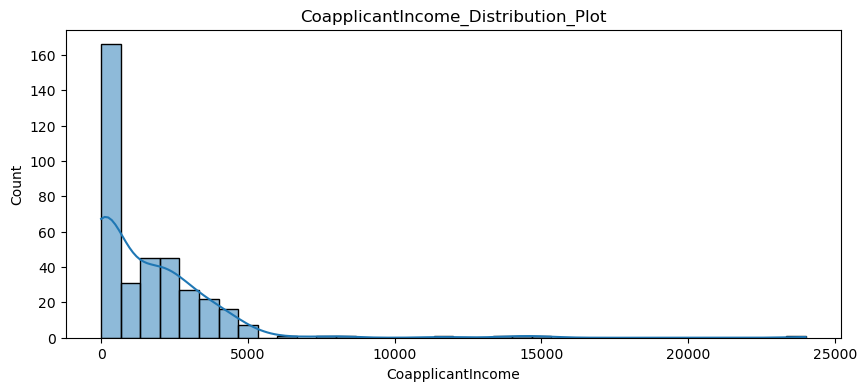

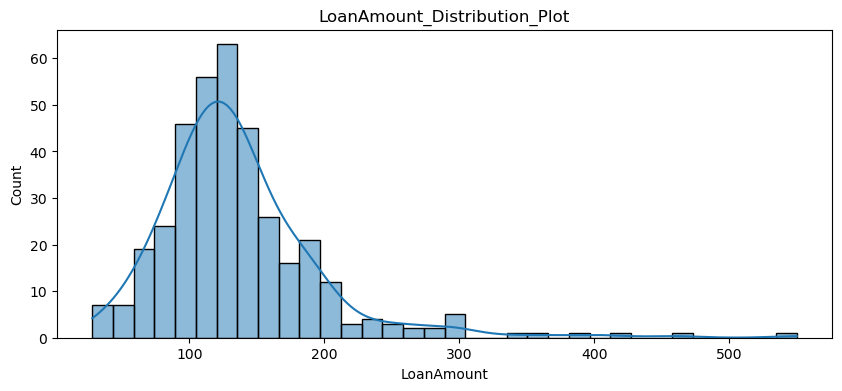

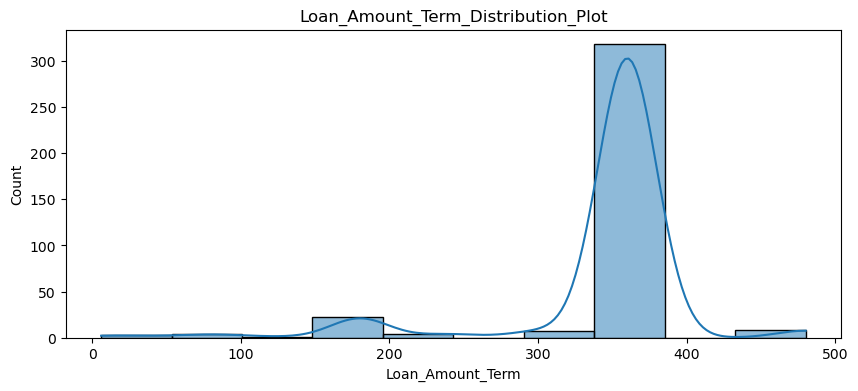

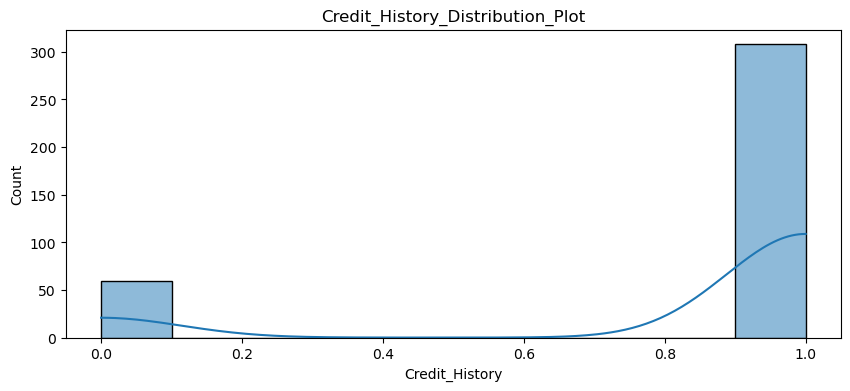

In [24]:
folder_name="Distributions"
for i in num:
    plt.figure(figsize=(10,4))
    plt.title(f"{i}_Distribution_Plot")
    sns.histplot(loan_df[i],kde=True)
    file_name=f"{i}_Distribution"
    os.makedirs(folder_name,exist_ok=True)
    directory=os.path.join(cwd,folder_name)
    path=os.path.join(directory,file_name)
    plt.savefig(path)
    plt.show()

   - C) Box plot

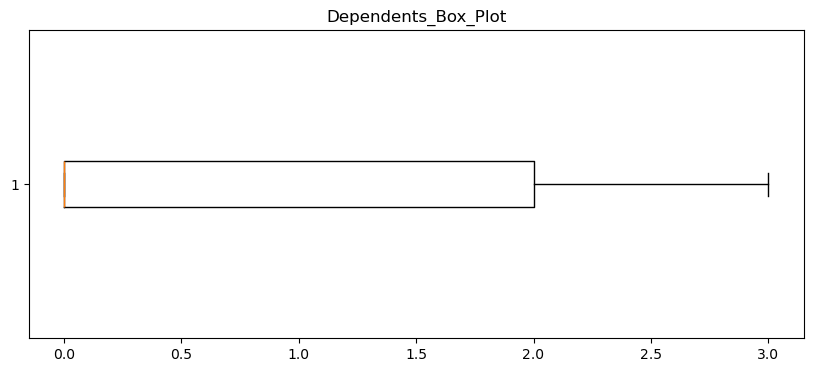

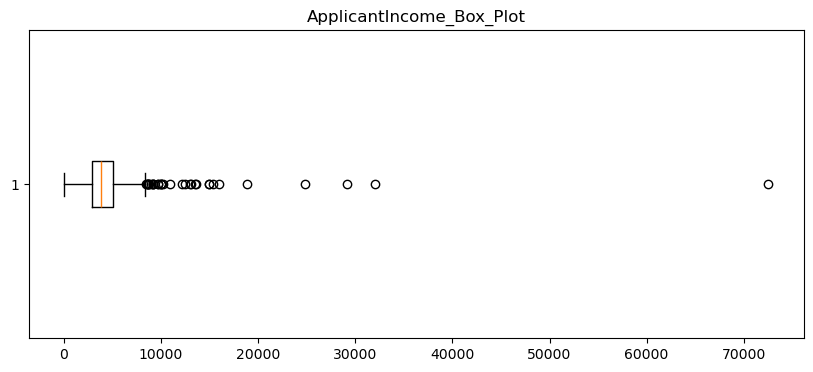

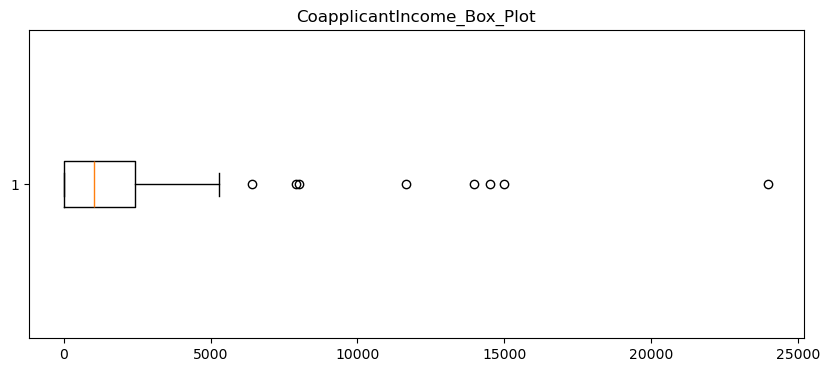

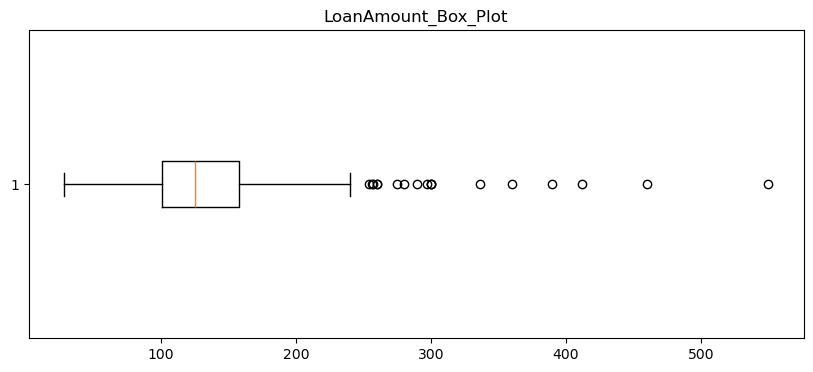

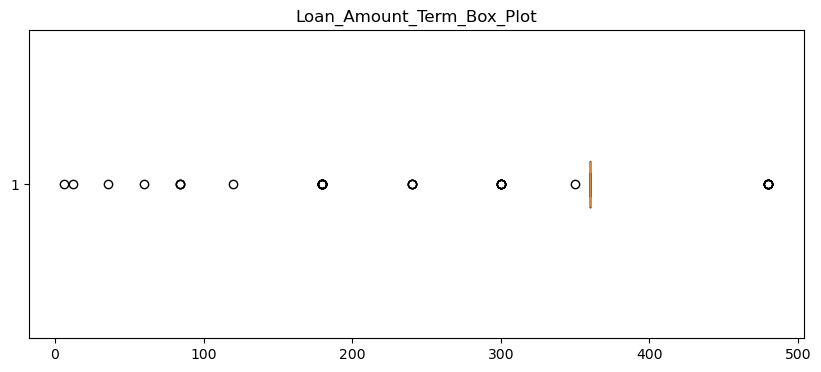

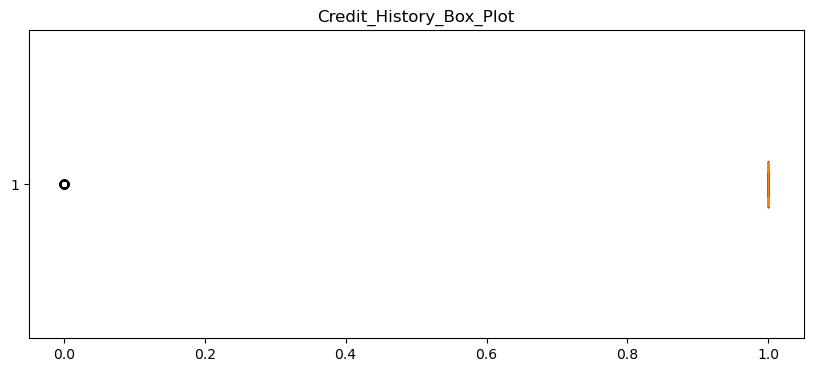

In [25]:
folder_name="Box Plots"
for i in num:
    plt.figure(figsize=(10,4))
    plt.title(f"{i}_Box_Plot")
    plt.boxplot(loan_df[i],vert=False)
    file_name=f"{i}_Box_Plot"
    os.makedirs(folder_name,exist_ok=True)
    directory=os.path.join(cwd,folder_name)
    path=os.path.join(directory,file_name)
    plt.savefig(path)
    plt.show()

**9). Outlier analysis**
   
   - Impute the outliers with Median

In [26]:
for i in num:
    Q1=np.percentile(loan_df[i],25)
    Q2=np.percentile(loan_df[i],50)
    Q3=np.percentile(loan_df[i],75)
    IQR=Q3-Q1
    LB=Q1-1.5*IQR
    UB=Q3+1.5*IQR
    median=np.median(loan_df[i])
    loan_df.loc[(loan_df[i]<LB)|(loan_df[i]>UB),i]=median

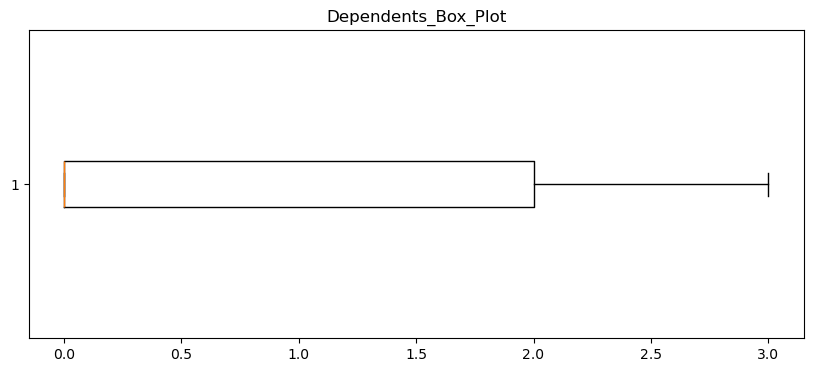

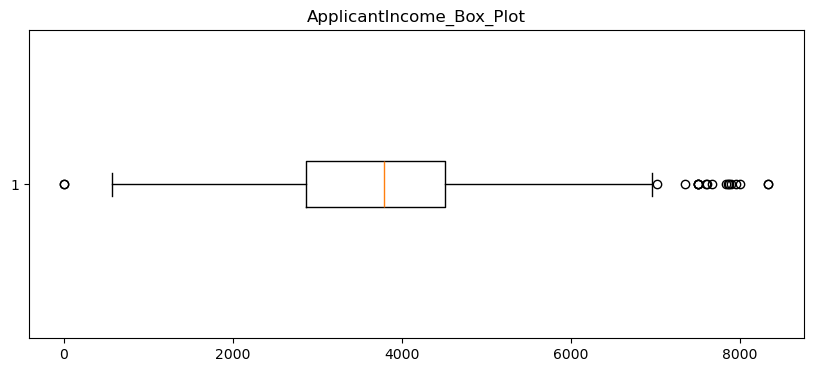

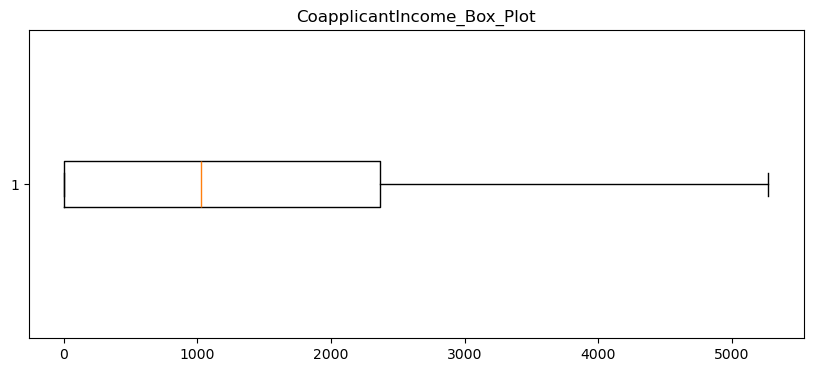

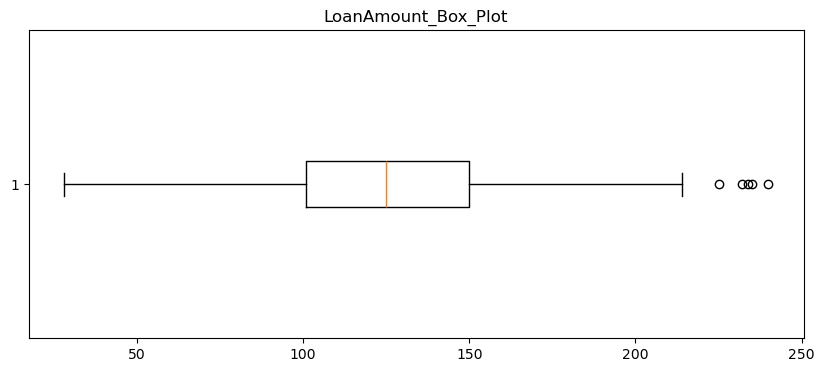

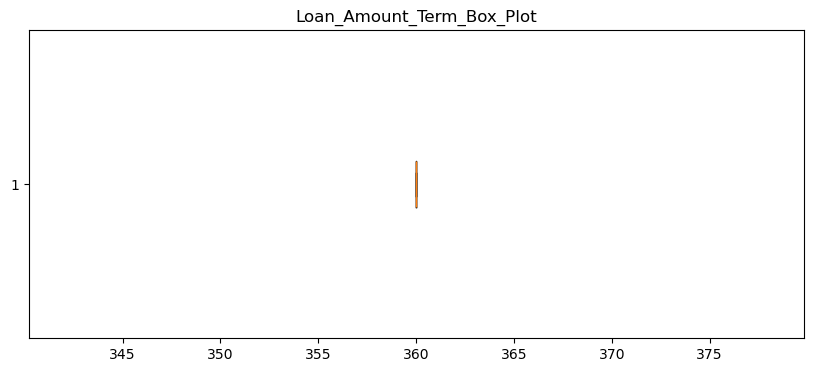

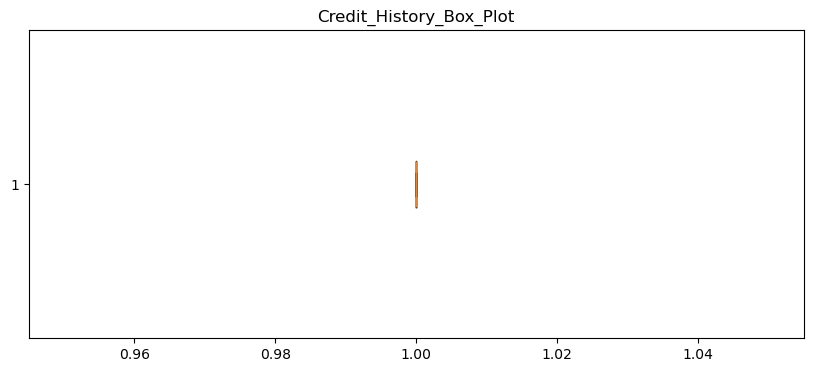

In [27]:
folder_name="Non Outlier Box Plots"
for i in num:
    plt.figure(figsize=(10,4))
    plt.title(f"{i}_Box_Plot")
    plt.boxplot(loan_df[i],vert=False)
    file_name=f"{i}_Box_Plot"
    os.makedirs(folder_name,exist_ok=True)
    directory=os.path.join(cwd,folder_name)
    path=os.path.join(directory,file_name)
    plt.savefig(path)
    plt.show()

- Still we have outliers in **ApplicantIncome and  LoanAmount** 

{'whiskers': [<matplotlib.lines.Line2D at 0x1c00fbfaad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c00fbfad50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c00fbfa990>],
 'medians': [<matplotlib.lines.Line2D at 0x1c00fbfafd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c00fbfb110>],
 'means': []}

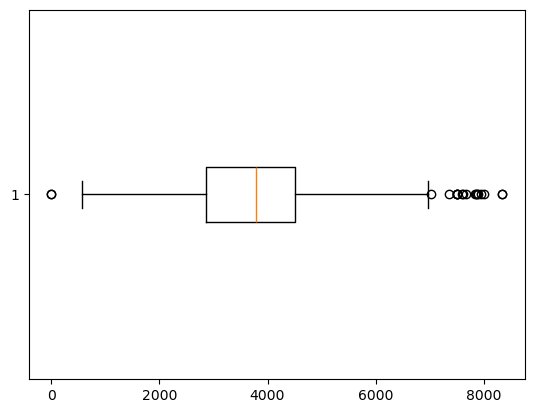

In [28]:
Q1 = np.percentile(loan_df["ApplicantIncome"], 25)
Q2 = np.percentile(loan_df["ApplicantIncome"], 50)
Q3 = np.percentile(loan_df["ApplicantIncome"], 75)
IQR = Q3 - Q1
LB = Q1 - 3 * IQR
UB = Q3 + 3 * IQR
median_val = np.median(loan_df["ApplicantIncome"])

loan_df.loc[
    (loan_df["ApplicantIncome"] < LB) | (loan_df["ApplicantIncome"] > UB),
    "ApplicantIncome"
] = median_val

plt.boxplot(loan_df["ApplicantIncome"],vert=False)


**10). Find the Correlation between numerical columns
    Heat map**

<Axes: >

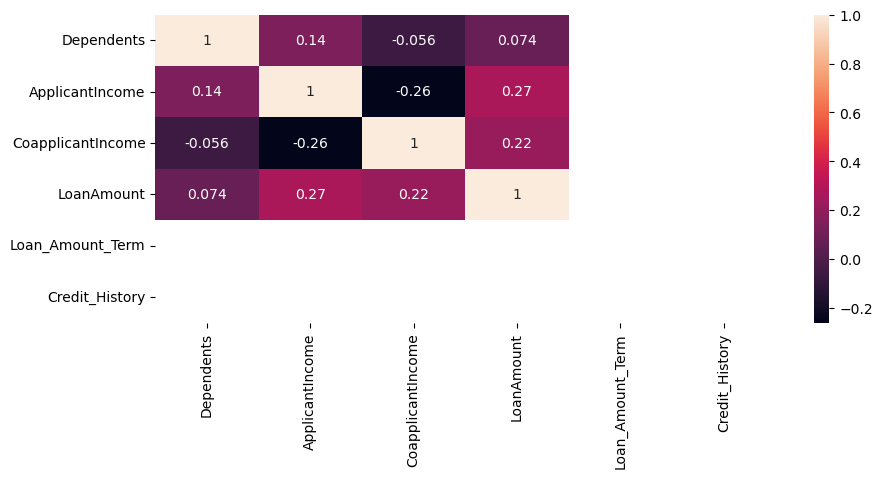

In [29]:
num=loan_df.select_dtypes(exclude="object").columns
corrn=loan_df.corr(numeric_only=True)
plt.figure(figsize=(10,4))
sns.heatmap(corrn,annot=True)

**11). Convert cat to Numerical**
   - A) LabelEncoder



In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat:
    loan_df[i]=le.fit_transform(loan_df[i])
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


   - B) One hot encoder

In [36]:
temp_df=pd.read_csv("loan_dataset.csv")
cat=temp_df.select_dtypes(include="object").columns
for i in cat:
    print(pd.get_dummies(temp_df[i],dtype="int"))

     LP001015  LP001022  LP001031  LP001035  LP001051  LP001054  LP001055  \
0           1         0         0         0         0         0         0   
1           0         1         0         0         0         0         0   
2           0         0         1         0         0         0         0   
3           0         0         0         1         0         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
362         0         0         0         0         0         0         0   
363         0         0         0         0         0         0         0   
364         0         0         0         0         0         0         0   
365         0         0         0         0         0         0         0   
366         0         0         0         0         0         0         0   

     LP001056  LP001059  LP001067  ...  LP002952  LP002954  LP002962  \
0  

**12). Scale the data**
   -  A) Z standardization



In [38]:
num=loan_df.select_dtypes(exclude="object").columns
cat=loan_df.select_dtypes(include="object").columns
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in num:
    loan_df[f"{i}_ss"]=ss.fit_transform(loan_df[[i]])
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Married_ss,Dependents_ss,Education_ss,Self_Employed_ss,ApplicantIncome_ss,CoapplicantIncome_ss,LoanAmount_ss,Loan_Amount_Term_ss,Credit_History_ss,Property_Area_ss
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,...,0.758358,-0.758222,-0.544812,-0.334845,1.273228,-0.913558,-0.409192,0.0,0.0,1.118764
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,...,0.758358,0.181871,-0.544812,-0.334845,-0.518052,0.128213,-0.005228,0.0,0.0,1.118764
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,...,0.758358,1.121964,-0.544812,-0.334845,0.785436,0.336567,2.065087,0.0,0.0,1.118764
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,...,0.758358,1.121964,-0.544812,-0.334845,-1.016683,0.854674,-0.661670,0.0,0.0,1.118764
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,...,-1.318638,-0.758222,1.835497,-0.334845,-0.382554,-0.913558,-1.217121,0.0,0.0,1.118764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,...,0.758358,2.062056,1.835497,2.986456,0.114045,0.320593,-0.333449,0.0,0.0,1.118764
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,...,0.758358,-0.758222,-0.544812,-0.334845,0.214991,-0.421148,-0.282954,0.0,0.0,1.118764
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,...,-1.318638,-0.758222,-0.544812,-0.334845,-0.400169,0.470608,-0.005228,0.0,0.0,-0.095989
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,...,0.758358,-0.758222,-0.544812,-0.334845,0.785436,0.748413,0.802700,0.0,0.0,-1.310741


   - B) Normalization

$$
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$


In [40]:
for i in num:
    x=loan_df[i]
    x_min=loan_df[i].min()
    x_max=loan_df[i].max()
    loan_df[f"{i}_normalization"]=(x-x_min)/x_max-x_min
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Married_normalization,Dependents_normalization,Education_normalization,Self_Employed_normalization,ApplicantIncome_normalization,CoapplicantIncome_normalization,LoanAmount_normalization,Loan_Amount_Term_normalization,Credit_History_normalization,Property_Area_normalization
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,...,1.0,0.000000,0.0,0.0,0.686345,0.000000,-27.658333,-360.0,-1.0,1.0
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,...,1.0,0.333333,0.0,0.0,0.369090,0.284522,-27.591667,-360.0,-1.0,1.0
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,...,1.0,0.666667,0.0,0.0,0.599952,0.341426,-27.250000,-360.0,-1.0,1.0
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,...,1.0,0.666667,0.0,0.0,0.280778,0.482929,-27.700000,-360.0,-1.0,1.0
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,...,0.0,0.000000,1.0,0.0,0.393089,0.000000,-27.791667,-360.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,...,1.0,1.000000,1.0,1.0,0.481042,0.337064,-27.645833,-360.0,-1.0,1.0
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,...,1.0,0.000000,0.0,0.0,0.498920,0.134484,-27.637500,-360.0,-1.0,1.0
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,...,0.0,0.000000,0.0,0.0,0.389969,0.378035,-27.591667,-360.0,-1.0,0.5
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,...,1.0,0.000000,0.0,0.0,0.599952,0.453907,-27.458333,-360.0,-1.0,0.0


In [41]:
path="Updated_Loan_Dataset.csv"
loan_df.to_csv(path)